In [47]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch
from tqdm import tqdm
import pandas as pd
import json
import numpy as np

In [11]:
torch.cuda.set_device(1)

In [2]:
tokenizer=BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment')
model=BertForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment')

In [3]:
text='今天心情不好'

output=model(torch.tensor([tokenizer.encode(text)]))
print(torch.nn.functional.softmax(output.logits,dim=-1))

tensor([[0.9551, 0.0449]], grad_fn=<SoftmaxBackward0>)


In [6]:
ta = pd.read_excel('Tourist_Attraction.xlsx')

In [40]:
ta.loc[14504]

相关地点数量                                                  1.0
微博id                                                 愤怒的小元宝
微博主页      https://weibo.com/6150878902?refer_flag=100103...
文本        石家原籍山东，祖辈漕运发家后在清乾隆年间定居杨柳青。石家于清道光三年（1823），析产为四大...
日期                                        2019年04月20日 20:30
图片        006IgsAely1g29deicij9j34mo3341la.jpg 006IgsAel...
转发数                                                     0.0
评论数                                                     3.0
点赞数                                                     0.0
地点                                                      尊美堂
FID                                                375669.0
经度                                               117.011283
纬度                                                 39.13443
Name: 14504, dtype: object

In [8]:
texts = ta.文本

In [14]:
model = model.cuda()

In [ ]:
sentiment = []
with torch.no_grad():
    for i, t in tqdm(enumerate(texts.items()), total=len(texts), ncols=50):
        the_text = t[1]
        
        # for text in the_text.split():
        output = model(torch.tensor([tokenizer.encode(the_text)]).cuda())
        predicts = torch.nn.functional.softmax(output.logits,dim=-1).cpu().numpy()
        sentiment.append([i, predicts[0]])

In [46]:
with open('sentiment.json', 'w') as f:
    json.dump([[i, p.tolist()] for i, p in sentiment], f)

In [49]:
np_se = np.array([p for i, p in sentiment])

In [50]:
import matplotlib.pyplot as plt

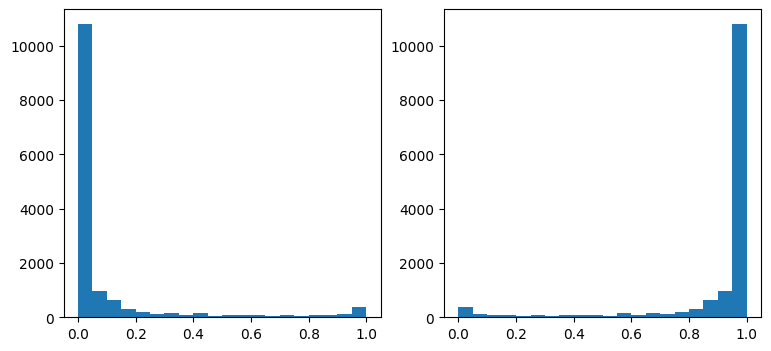

In [56]:
plt.figure(figsize=(9, 4))

plt.subplot(1,2,1)
_ = plt.hist(np_se[:,0], bins=20)

plt.subplot(1,2,2)
_ = plt.hist(np_se[:,1], bins=20)


# plt.scatter(np_se[:,0], np_se[:,1])

In [22]:
t = '#第五届中国天津国际直升机博览会# 冒雨看飞行表演，大部分都是刚参见完70周年，看完更爱我的祖国 2天津·爱飞客(天津)航空俱乐部有限公司'
t.split()

['#第五届中国天津国际直升机博览会#', '冒雨看飞行表演，大部分都是刚参见完70周年，看完更爱我的祖国', '2天津·爱飞客(天津)航空俱乐部有限公司']

In [25]:
from transformers import AutoModelForSequenceClassification


In [ ]:
tokenizer = BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-MegatronBert-1.3B-Sentiment')
model = AutoModelForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-MegatronBert-1.3B-Sentiment')

In [29]:
tokenizer = BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment')
model = BertForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 tokenizer = BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment')     │
│   2 model = BertForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-330M     │
│   3                                                                                              │
│                                                                                                  │
│ /home/yangwenhao/anaconda3/envs/vits/lib/python3.10/site-packages/transformers/tokenization_util │
│ s_base.py:1796 in from_pretrained                                                                │
│                                                                                                  │
│   1793 │   │   │   )                                                                             │
│   1794 │   │                                                                                     │
│   1795 │   │   if all(full_file_name is None for full_file_name in resolved_vocab_files.values(  │
│ ❱ 1796 │   │   │   raise EnvironmentError(                                                       │
│   1797 │   │   │   │   f"Can't load tokenizer for '{pretrained_model_name_or_path}'. If you wer  │
│   1798 │   │   │   │   "'https://huggingface.co/models', make sure you don't have a local direc  │
│   1799 │   │   │   │   f"Otherwise, make sure '{pretrained_model_name_or_path}' is the correct   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
OSError: Can't load tokenizer for 'IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment'. If you were trying to load it from
'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make 
sure 'IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment' is the correct path to a directory containing all relevant files
for a BertTokenizer tokenizer.